Nombre : Laura Camila Rios Quintero
cc = 1041350570

#Librerias

In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

#1

In [ ]:
# Escribir la función

def velocidad(H, L, g,t):
    n = np.sqrt(2*g*h)
    v = n*np.tanh((n*t)/(2*L))

    return v


<ipython-input-26-ef050ea50c6d>:10: RuntimeWarning: invalid value encountered in sqrt
  v = lambda H : np.sqrt(2*g*H)*np.tanh(((np.sqrt(2*g*H))*t)/(2*L))


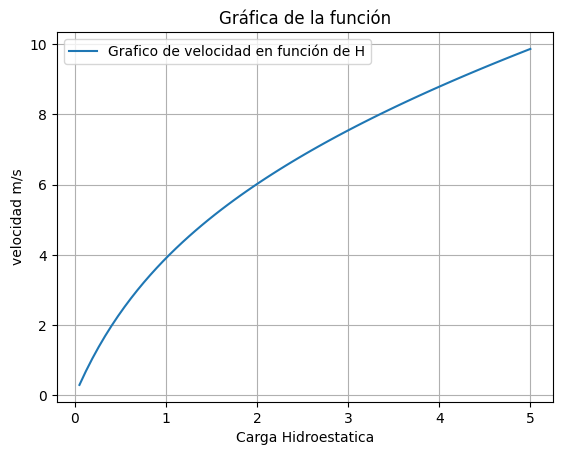

In [ ]:
# Datos que nos dan

L = 4 #metros
t = 2.5 # segundos
g = 9.8    # Gravedad


H = np.linspace(-2,5,100)

v = lambda H : np.sqrt(2*g*H)*np.tanh(((np.sqrt(2*g*H))*t)/(2*L))

# Hacer grafica

plt.plot(H, v(H), label = 'Grafico de velocidad en función de H', )       # Graficar los x e y
plt.xlabel('Carga Hidroestatica')      # nombre del eje x
plt.ylabel('velocidad m/s')
plt.grid(True)
plt.title("Gráfica de la función")
plt.legend()
plt.show()

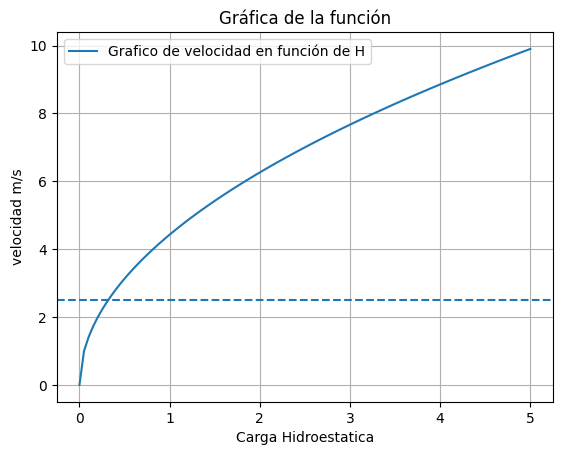

In [ ]:
plt.plot(H, v(H), label = 'Grafico de velocidad en función de H', )       # Graficar los x e y
plt.xlabel('Carga Hidroestatica')      # nombre del eje x
plt.ylabel('velocidad m/s')
plt.axhline(2.5, linestyle = '--')
plt.grid(True)
plt.title("Gráfica de la función")
plt.legend()
plt.show()

In [ ]:
# d

# Hallar raíz de función
H = np.linspace(0,5,100)

def biseccion(f,a,b,tol):

    while (b-a)/2 > tol:
        c = (a + b)/2

        if f(c)==0:
            return c

        elif f(a)*f(c) < 0 :
            b = c

        else:
            a = c

    return c


f = lambda H : np.sqrt(2*g*H)*np.tanh(((np.sqrt(2*g*H))*t)/(2*L)) -5
a = 0
b = 5
tol = 1e-7

raiz_1 = biseccion(f,a,b,tol)


In [ ]:
# e
# utilizando método de newton
raiz = newton(f,0)

print(raiz)


# error relativo entre las dos raices

error = abs((raiz_1 - raiz))

print(error)

1.4673903992813202
1.0817832030163288e-07


#2

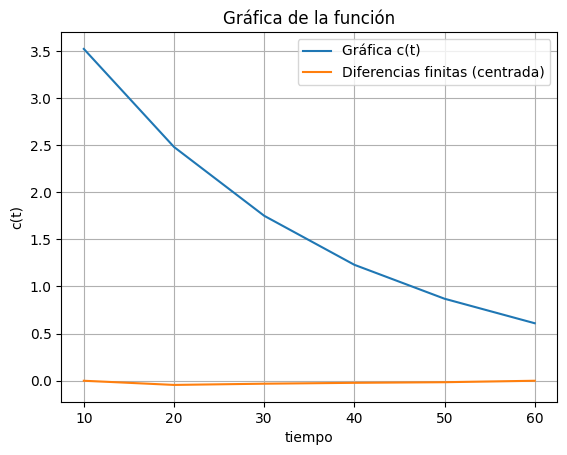

In [18]:
# Datos

t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])


def derivada(t,c):

    derivadas = np.zeros(len(t))    # Array donde se guardaran las derivadas


    for i in range(1, len(t)-1):

        derivadas[i] = (c[i+1] - c[i-1]) / (2*(t[i+1]-t[i-1]))   # Utilizo el método de Diferencias finitas centradas

    return derivadas

derivada_ = derivada(t,c)

# graficar la función con su derivada

plt.plot(t,c, label = 'Gráfica c(t)')
plt.plot(t, derivada_ ,label = 'Diferencias finitas (centrada)')
plt.xlabel('tiempo')
plt.ylabel('c(t)')
plt.grid(True)
plt.title('Gráfica de la función')
plt.legend()
plt.show()



In [19]:
# b

# Comparacion de derivadas
derivada_gradient = np.gradient(c,t)
derivada_ = derivada(t,c)

print(f' Derivadas con el método numpy.gradient: {derivada_gradient}')
print(f' Derivadas con el método de diferencias finitas centradas: {derivada_}')


'''
Si tomamos como excta la de numpy se observa que
la de diferencias finitas se aleja bastante
del valor real de las derivadas
'''

 Derivadas con el método numpy.gradient: [-0.104  -0.0885 -0.0625 -0.044  -0.031  -0.026 ]
 Derivadas con el método de diferencias finitas centradas: [ 0.      -0.04425 -0.03125 -0.022   -0.0155   0.     ]


'\nSi tomamos como excta la de numpy se observa que \nla de diferencias finitas se aleja bastante \ndel valor real de las derivadas\n'

#3

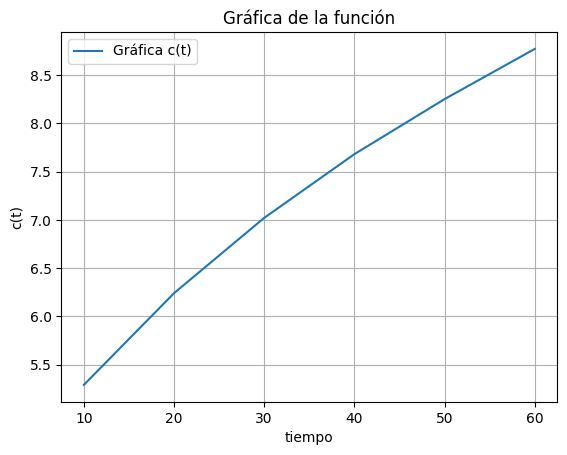

In [13]:
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])

# Gráfica

plt.plot(t,c, label = 'Gráfica c(t)')
plt.xlabel('tiempo')
plt.ylabel('c(t)')
plt.grid(True)
plt.title('Gráfica de la función')
plt.legend()
plt.show()

In [22]:
# b
from scipy.interpolate import CubicHermiteSpline

t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])



derivadas = np.gradient(c,t)

poly_hermite = CubicHermiteSpline(t,c,derivadas)         # Polinomio de hermite
poly_lagrange = lagrange(t,c)

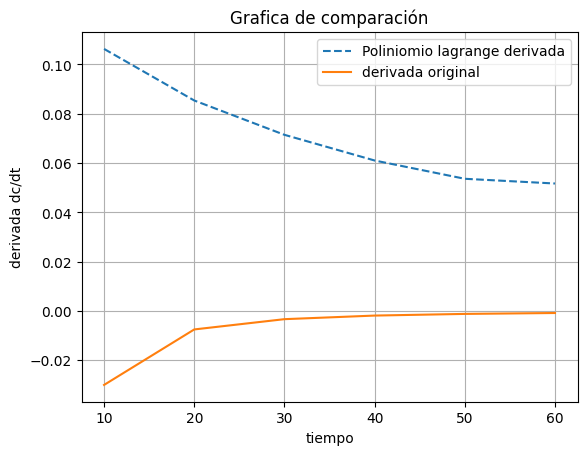

In [32]:
# c

from numpy.polynomial.polynomial import Polynomial

poly_coef = Polynomial(poly_lagrange.coef[::-1])
derivative = poly_coef.deriv()

derivada_lagrange = derivative(t)

f = lambda c:-3*(1/c**2)     # funcion original


# Graficar el polinomio de lagrange
plt.plot(t,derivada_lagrange,linestyle= '--',label= 'Poliniomio lagrange derivada')
plt.plot(t,f(t),linestyle = '-', label = 'derivada original')
plt.xlabel('tiempo')
plt.ylabel('derivada dc/dt')
plt.title('Grafica de comparación')
plt.legend()
plt.grid()
plt.show()

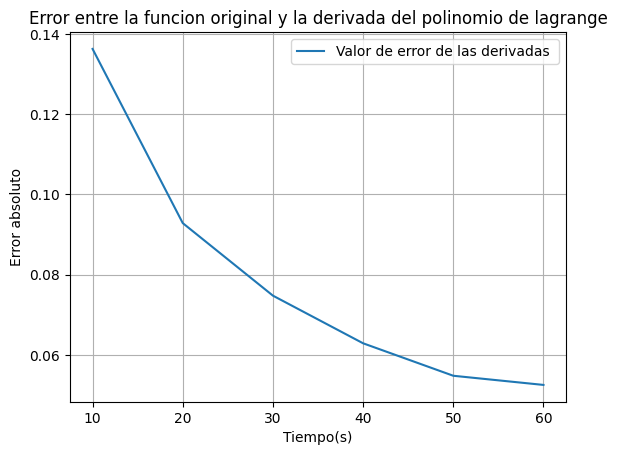

In [34]:
# e

# El error absoluto sería el valor absoluto de la resta de ambas funciones


error = np.abs(derivada_lagrange - f(t))

# graficando el error

plt.plot(t, error, label = 'Valor de error de las derivadas ')
plt.xlabel("Tiempo(s)")
plt.ylabel("Error absoluto")
plt.title("Error entre la funcion original y la derivada del polinomio de lagrange")
plt.legend()
plt.grid()
plt.show()